Upload your zipped MBTI dataset (e.g., mbti_1.csv.zip)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving mbti_1.csv.zip to mbti_1.csv (2).zip
Dataset loaded. First few rows:


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


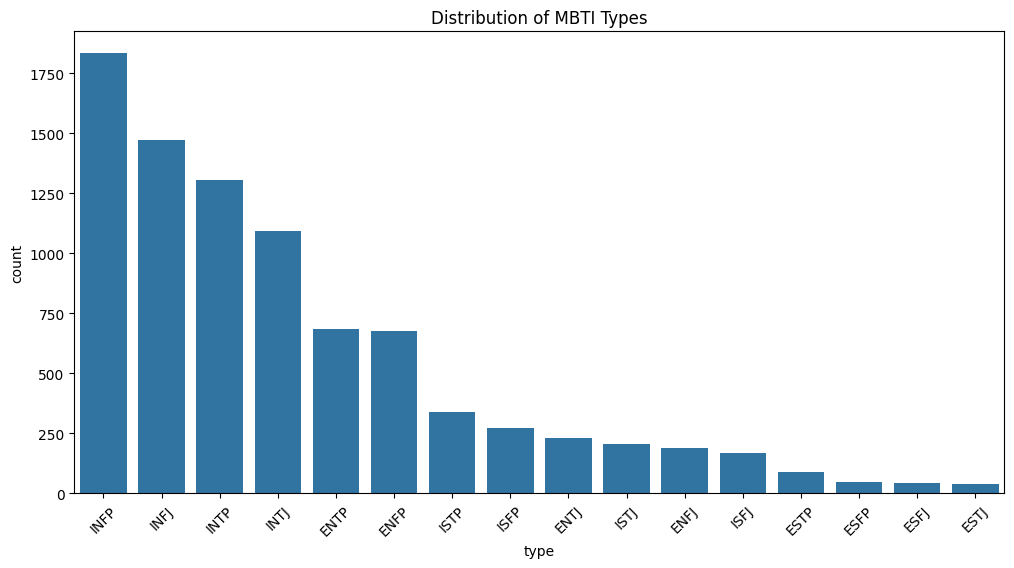

Classification Report:

              precision    recall  f1-score   support

        ENFJ       0.54      0.17      0.26        41
        ENFP       0.67      0.56      0.61       125
        ENTJ       0.82      0.41      0.55        44
        ENTP       0.68      0.53      0.59       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       1.00      0.13      0.24        15
        INFJ       0.64      0.68      0.66       288
        INFP       0.61      0.86      0.72       370
        INTJ       0.59      0.72      0.65       193
        INTP       0.68      0.78      0.73       293
        ISFJ       0.92      0.27      0.41        45
        ISFP       0.63      0.23      0.33        53
        ISTJ       0.71      0.27      0.39        44
        ISTP       0.72      0.46      0.56        67

    accuracy                           0.64      1735
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


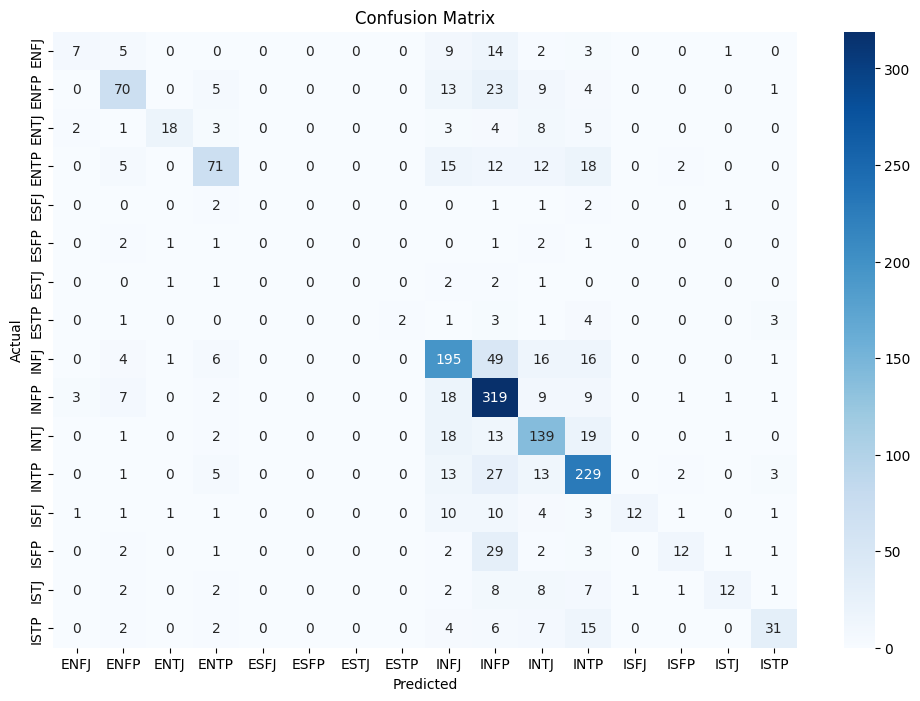

Sample Text:
 I enjoy helping people and discussing theories about the universe.
Predicted MBTI type: INTP


from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('posts').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['posts'].value_counts()
    for x_label, grp in _df_11.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('posts')

In [4]:
# Step 1: Install required libraries
!pip install -q scikit-learn pandas matplotlib seaborn nltk

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from google.colab import files
import zipfile
import io

# Step 3: Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 4: Upload dataset
print("Upload your zipped MBTI dataset (e.g., mbti_1.csv.zip)")
uploaded = files.upload()

# Step 5: Unzip and load the CSV file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
            zip_ref.extractall("mbti_data")

df = pd.read_csv("mbti_data/mbti_1.csv")
print("Dataset loaded. First few rows:")
display(df.head())

# Step 6: Visualize MBTI distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Distribution of MBTI Types")
plt.xticks(rotation=45)
plt.show()

# Step 7: Preprocess text
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['cleaned_posts'] = df['posts'].apply(preprocess_text)

# Step 8: Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_code'] = le.fit_transform(df['type'])

# Step 9: Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_posts'])
y = df['type_code']

# Step 10: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Train model
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# Step 12: Evaluate model
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 13: Predict a new sample
def predict_mbti(text):
    text = preprocess_text(text)
    vector = vectorizer.transform([text])
    pred = model.predict(vector)
    return le.inverse_transform(pred)[0]

# Example prediction
sample_text = "I enjoy helping people and discussing theories about the universe."
print("Sample Text:\n", sample_text)
print("Predicted MBTI type:", predict_mbti(sample_text))
